<a href="https://colab.research.google.com/github/ajtamayoh/ML-for-Sports-betting-using-NFL-data/blob/main/Getting_the_best_picks_for_bets_(NFL_case).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Sports betting using NFL data

### By Ph. D. Antonio Tamayo

### ETL (ELT this is a common pattern using cloud services) process

To get the dataset, go to: [dataset](https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data)

In [1]:
!pip install lazypredict

In [2]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lazypredict as lz

In [3]:
# Loading GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset loading
stadiums = pd.read_csv("/content/drive/MyDrive/ML Engineer/Sonatafy/SportivoAI/Datasets/NFL scores and betting data/nfl_stadiums.csv", encoding="latin")
stadiums.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.4846,-80.2144,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dataset loading
nfl_teams = pd.read_csv("/content/drive/MyDrive/ML Engineer/Sonatafy/SportivoAI/Datasets/NFL scores and betting data/nfl_teams.csv")
nfl_teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


In [4]:
# Dataset loading
spreadspoke_scores = pd.read_csv("/content/drive/MyDrive/ML Engineer/Sonatafy/SportivoAI/Datasets/NFL scores and betting data/spreadspoke_scores.csv")
spreadspoke_scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [33]:
spreadspoke_scores.isnull().any()

schedule_date          False
schedule_season        False
schedule_week          False
schedule_playoff       False
team_home              False
score_home             False
score_away             False
team_away              False
team_favorite_id        True
spread_favorite         True
over_under_line         True
stadium                False
stadium_neutral        False
weather_temperature     True
weather_wind_mph        True
weather_humidity        True
weather_detail          True
dtype: bool

### Statistical Analysis

In [104]:
weather_temperature = spreadspoke_scores["weather_temperature"]
weather_wind_mph = 	spreadspoke_scores["weather_wind_mph"]
weather_humidity = spreadspoke_scores["weather_humidity"]
score_home = spreadspoke_scores["score_home"]
score_away = spreadspoke_scores["score_away"]
weather_temperature.shape

(13516,)

In [35]:
weather_temperature.describe()

count    12309.000000
mean        58.833211
std         15.538656
min         -6.000000
25%         48.000000
50%         62.000000
75%         72.000000
max         97.000000
Name: weather_temperature, dtype: float64

(array([  18.,   64.,  189.,  867., 1457., 1999., 2658., 4211.,  768.,
          78.]),
 array([-6. ,  4.3, 14.6, 24.9, 35.2, 45.5, 55.8, 66.1, 76.4, 86.7, 97. ]),
 <BarContainer object of 10 artists>)

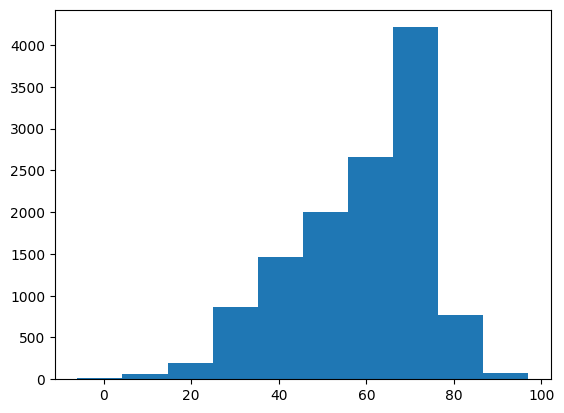

In [38]:
plt.hist(weather_temperature)

In [5]:
score_home = spreadspoke_scores["score_home"]
score_home_stats = score_home.describe()
score_home_stats

count    13516.000000
mean        22.461897
std         10.526423
min          0.000000
25%         15.000000
50%         22.000000
75%         29.000000
max         72.000000
Name: score_home, dtype: float64

(array([1.136e+03, 2.225e+03, 3.340e+03, 3.311e+03, 2.063e+03, 9.950e+02,
        3.270e+02, 1.000e+02, 1.800e+01, 1.000e+00]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

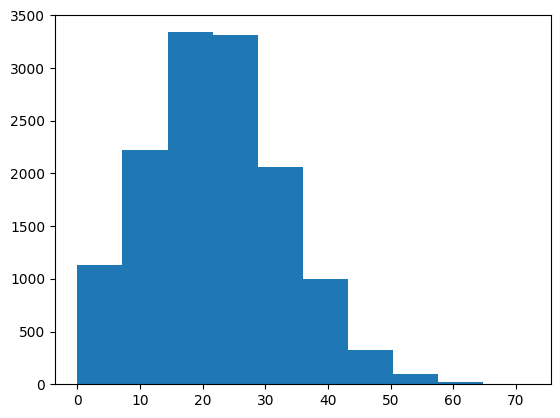

In [6]:
plt.hist(score_home)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4254119330>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4254119750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4254119090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4254119c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4254119f30>],
 'means': []}

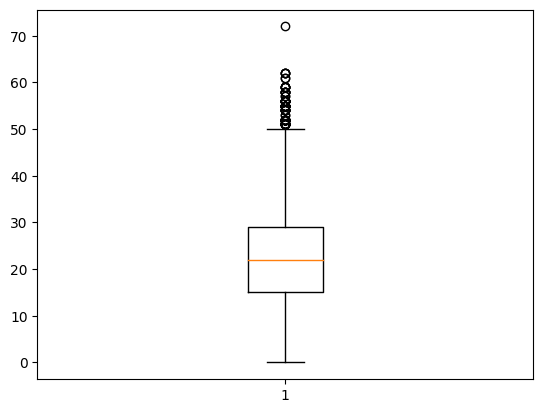

In [7]:
plt.boxplot(score_home)

In [9]:
# Label Encoding
# Transforming Pipeline

def labelencoder(feature):

  from sklearn import preprocessing as pp

  le = pp.LabelEncoder()
  le.fit(feature)
  #print(le.classes_)
  feature_en = le.transform(feature)
  #print(feature)
  feature_en.shape
  return feature_en

In [10]:
date = labelencoder(spreadspoke_scores["schedule_date"])
season = labelencoder(spreadspoke_scores["schedule_season"])
playoff = labelencoder(spreadspoke_scores["schedule_playoff"])
team_home = labelencoder(spreadspoke_scores["team_home"])
team_away = labelencoder(spreadspoke_scores["team_away"])
stadium = labelencoder(spreadspoke_scores["stadium"])
stadium_neutral = labelencoder(spreadspoke_scores["stadium_neutral"])
schedule_week = labelencoder(spreadspoke_scores["schedule_week"])

In [60]:
def imputation(var):
  from sklearn.impute import SimpleImputer
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  imp_var = imp.fit(var.to_numpy().reshape(-1,1))
  imp_var = imp.transform(var.to_numpy().reshape(-1,1))
  return imp_var[:,0]

In [113]:
np.mean(score_home)

22.461897010949986

In [118]:
#This lazy strategy doesn't work, but it could be improved using other approaches focus on the average for each particular game.
mean_score_home = np.ones(score_home.shape[0])
mean_score_home = np.mean(score_home)*mean_score_home

mean_score_away = np.ones(score_away.shape[0])
mean_score_away = np.mean(score_away)*mean_score_away

In [129]:
X = np.array([date, season, playoff, team_home, team_away, stadium, stadium_neutral, schedule_week, imputation(weather_temperature), imputation(weather_wind_mph), imputation(weather_humidity)])
X = X.T
X.shape

(13516, 11)

In [65]:
# Target variable Y
# Y -> 1 (Home team is the winner)
# Y -> 0 (Away team is the winner)
Y = []
for i in range(spreadspoke_scores["score_home"].shape[0]):
  if spreadspoke_scores["score_home"].iloc[i] > spreadspoke_scores["score_away"].iloc[i]:
    Y.append(1) # Winner
  else:
    Y.append(0) # Loser

In [66]:
Y = np.asarray(Y)
Y.shape

(13516,)

In [126]:
Y

array([0, 1, 1, ..., 1, 1, 0])

In [127]:
c1, c0 = 0, 0
for i in Y:
  if i == 1:
    c1+=1
  else:
    c0+=1
print(c1, "% winner (home team) | ", c0, "% loser (home team)")

7719 % winner |  5797 % loser


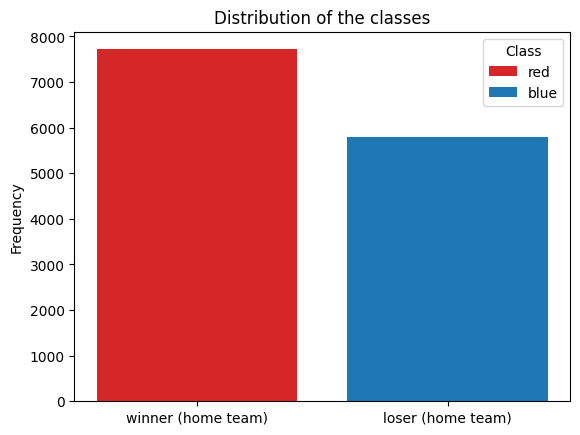

In [144]:
fig, ax = plt.subplots()

classes = ['winner (home team)', 'loser (home team)']
counts = [c1, c0]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(classes, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Frequency')
ax.set_title('Distribution of the classes')
ax.legend(title='Class')

plt.show()

## ML models training

In [133]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)


In [134]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [01:24<00:00,  2.91s/it]

[LightGBM] [Info] Number of positive: 5413, number of negative: 4048
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 9461, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.572138 -> initscore=0.290581
[LightGBM] [Info] Start training from score 0.290581


In [135]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.57,0.55,0.55,0.56,1.99
LGBMClassifier,0.58,0.55,0.55,0.56,0.19
XGBClassifier,0.56,0.54,0.54,0.55,0.84
ExtraTreesClassifier,0.56,0.54,0.54,0.55,2.96
BaggingClassifier,0.54,0.53,0.53,0.54,0.55
AdaBoostClassifier,0.57,0.53,0.53,0.51,0.49
KNeighborsClassifier,0.54,0.53,0.53,0.54,1.16
DecisionTreeClassifier,0.53,0.52,0.52,0.53,0.53
NearestCentroid,0.52,0.52,0.52,0.52,0.08


In [136]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import HistGradientBoostingClassifier as GBoost

clf = make_pipeline(StandardScaler(), GBoost(loss='log_loss', learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.1, max_bins=255, categorical_features=None, monotonic_cst=None, interaction_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None, class_weight=None))
#clf = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None))
clf.fit(X_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(gamma='auto'))])
clf.score(X_test, y_test)

0.5731196054254007

In [141]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10, 15, 20],'min_samples_split': [2, 5, 10, 15, 20]}
base_estimator = RF(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, factor=2, resource='n_estimators', max_resources=100).fit(X_train, y_train)
sh.best_estimator_.score(X_test, y_test)

0.5800246609124537

In [142]:
sh.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=96,
                       random_state=0)